In [195]:
## ray tracing scheme
import numpy as np
import matplotlib.pyplot as plt

# Define the scene
width, height = 400, 300
aspect_ratio = width / height
camera_position = np.array([0, 0, 1])
sphere_center = np.array([0, 0, -5])
sphere_radius = 1
light_position = np.array([5, 5, 5])
light_intensity = 1.5

# Define the image plane
image_plane = np.zeros((height, width, 3))

# Function to normalize vectors
def normalize(v):
    return v / np.linalg.norm(v)

# Function to compute the intersection of a ray with a sphere
def intersect_sphere(ray_origin, ray_direction, sphere_center, sphere_radius):
    oc = ray_origin - sphere_center
    a = np.dot(ray_direction, ray_direction)
    b = 2.0 * np.dot(oc, ray_direction)
    c = np.dot(oc, oc) - sphere_radius * sphere_radius
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return False, None
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)
    return True, t

# Ray tracing loop
for i in range(height):
    for j in range(width):
        # Compute the direction of the ray
        x = (2 * (j + 0.5) / width - 1) * aspect_ratio
        y = 1 - 2 * (i + 0.5) / height
        ray_direction = normalize(np.array([x, y, -1]))
        
        # Check for intersection with the sphere
        hit, t = intersect_sphere(camera_position, ray_direction, sphere_center, sphere_radius)
        if hit:
            # Compute the intersection point
            intersection_point = camera_position + t * ray_direction
            
            # Compute the normal at the intersection point
            normal = normalize(intersection_point - sphere_center)
            
            # Compute the direction to the light
            light_direction = normalize(light_position - intersection_point)
            
            # Compute the intensity of the light at the intersection point
            intensity = max(0, np.dot(normal, light_direction)) * light_intensity
            
            # Set the pixel color
            image_plane[i, j] = np.array([intensity, intensity, intensity])

# Display the image
plt.imshow(np.clip(image_plane, 0, 1))
plt.axis('off')
plt.show()

KeyboardInterrupt: 

-1.034503254583776
-1.0332923606027826
-1.0314333084564473
-1.028936467973483
-1.0258156132063785
-1.0220877154155363
-1.0177726934955122
-1.0128931288455527
-1.007473952389529
-1.001542111823024
-0.995126227213234
-0.9882562428241036
-0.9809630825230603
-0.9732783153959258
-0.9652338373081514
-0.9568615731604843
-0.9481932035503481
-0.9392599185163008
-0.9300922000540959
-0.9207196341825493
-0.9111707525297592
-0.9014729027204238
-0.8916521462800588
-0.8817331823318468
-0.8717392950410616
-0.861692322550759
-0.8516126450382007
-0.8415191894901461
-0.8314294488321797
-0.8213595131382736
-0.8113241107784749
-0.8013366575228574
-0.7914093117981874
-0.7815530344812205
-0.7717776518019781
-0.7620919201159971
-0.7525035914821843
-0.7430194791494125
-0.7336455222084118
-0.7243868488046661


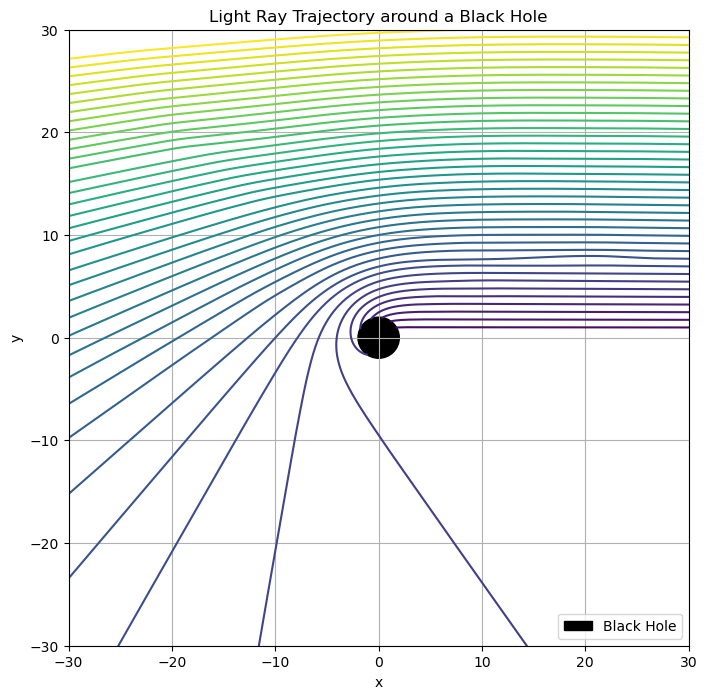

In [ ]:
# solve geodesics for photons in Schwarzschild metric
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
# G = 6.67430e-11  # Gravitational constant
# c = 3.0e8        # Speed of light
# M = 1.0e30       # Mass of the black hole (in kg)
c, G = 1, 1
M = 1
rs = 2 * G * M / c**2  # Schwarzschild radius

import matplotlib.patches as patches
# Plot the trajectory of the light ray
fig, ax = plt.subplots(figsize=(8, 8))
# Define a colormap
cmap = plt.get_cmap('viridis')



# Geodesic equations for Schwarzschild metric
def geodesics(t, var):
    #conserved quantities
    #pt=-E, pphi=L
    # rad, the, phi, prad, pthe, pphi = y
    t, rad, the, phi, pt, prad, pthe, pphi = var
    gUU00, gUU11, gUU22, gUU33 = -1/(1-rs/rad), (1-rs/rad), 1/rad**2, 1/(rad**2 * np.sin(the)**2)
    # gDD00, gDD11, gDD22, gDD33 = -(1-rs/rad), 1/(1-rs/rad), rad**2, rad**2 * np.sin(the)**2
    d0gUU00, d0gUU11, d0gUU22, d0gUU33 = 0, 0, 0, 0
    d1gUU00, d1gUU11, d1gUU22, d1gUU33 = rs/rad**2 / (1-rs/rad)**2, rs/rad**2, -2/rad**3, -2/(rad**3 * np.sin(the)**2)
    d2gUU00, d2gUU11, d2gUU22, d2gUU33 = 0, 0, 0, 2*np.cos(the)/(rad**2*np.sin(the)**3)
    d3gUU00, d3gUU11, d3gUU22, d3gUU33 = 0, 0, 0, 0
    # pt = -np.sqrt(-(prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33) / gUU00)
    # m2 = pt**2 * gUU00 + prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33
    # print(m2)
    dtdt    = pt   * gUU00
    draddt  = prad * gUU11
    dthedt  = pthe * gUU22
    dphidt  = pphi * gUU33 
    dptdt   = -1/2 * (d0gUU00 * pt**2 + d0gUU11 * prad**2 + d0gUU22 * pthe**2 + d0gUU33 * pphi**2) # 0
    dpraddt = -1/2 * (d1gUU00 * pt**2 + d1gUU11 * prad**2 + d1gUU22 * pthe**2 + d1gUU33 * pphi**2)
    dpthedt = -1/2 * (d2gUU00 * pt**2 + d2gUU11 * prad**2 + d2gUU22 * pthe**2 + d2gUU33 * pphi**2)
    dpphidt = -1/2 * (d3gUU00 * pt**2 + d3gUU11 * prad**2 + d3gUU22 * pthe**2 + d3gUU33 * pphi**2) # 0
    return [dtdt, draddt, dthedt, dphidt, dptdt, dpraddt, dpthedt, dpphidt]
    # return [draddt, dthedt, dphidt, dpraddt, dpthedt, dpphidt]

# Initial conditions
box_size = 15*rs
L_arr = np.linspace(1,box_size,40)
for L in L_arr:
# L = 6
    coord_x0 = box_size
    coord_y0 = L/c
    coord_z0 = 0

    rad0 = np.sqrt(coord_x0**2 + coord_y0**2 + coord_z0**2)
    E = -np.sqrt(1- rs/rad0)
    the0 = np.arccos(coord_z0 / rad0)
    phi0 = np.arctan2(coord_y0, coord_x0)



    coord_vthe0 = np.pi/2
    coord_vphi0 = - np.pi

    pt0 = -E
    pphi0 = L
    pthe0 = 0.0
    prad0 = -np.sqrt(-(E**2 * -1/(1-rs/rad0) + L**2 * 1/(rad0**2 * np.sin(the0)**2))/(1-rs/rad0))
    print(prad0)


    t0 = 0 
    pt0 = -E

    # Time span for the integration
    t_span = (0, 100)
    var0 = [rad0, the0, phi0, prad0, pthe0, pphi0]
    var0 = [t0, rad0, the0, phi0, pt0, prad0, pthe0, pphi0]

    # Solve the geodesic equations
    sol = solve_ivp(geodesics, t_span, var0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 10000))

    # Extract the solution
    # rad = sol.y[0]
    # the = sol.y[1]
    # phi = sol.y[2]

    
    rad = sol.y[1]
    the = sol.y[2]
    phi = sol.y[3]
    # Convert to Cartesian coordinates for plotting
    x = rad * np.sin(the) * np.cos(phi)
    y = rad * np.sin(the) * np.sin(phi)

    ax.plot(x, y, color=cmap(L / np.max(L_arr)))
    

# Add a circle with radius 2 at the origin to represent the black hole
circle = patches.Circle((0, 0), 2, color='black', label='Black Hole')
ax.add_patch(circle)


ax.set_xlim(-box_size, box_size)
ax.set_ylim(-box_size, box_size)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Light Ray Trajectory around a Black Hole')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
## ray tracing scheme
import numpy as np
import matplotlib.pyplot as plt

# Define the scene
width, height = 400, 300
aspect_ratio = width / height
camera_position = np.array([0, 0, 1])
sphere_center = np.array([0, 0, -5])
sphere_radius = 1
light_position = np.array([5, 5, 5])
light_intensity = 1.5

# Define the image plane
image_plane = np.zeros((height, width, 3))
    
# Function to normalize vectors
def normalize(v):
    return v / np.linalg.norm(v)

# Function to compute the intersection of a ray with a sphere
def intersect_sphere(ray_origin, ray_direction, sphere_center, sphere_radius):
    oc = ray_origin - sphere_center
    a = np.dot(ray_direction, ray_direction)
    b = 2.0 * np.dot(oc, ray_direction)
    c = np.dot(oc, oc) - sphere_radius * sphere_radius
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return False, None
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)
    return True, t

# Ray tracing loop
for i in range(height):
    for j in range(width):
        # Compute the direction of the ray
        x = (2 * (j + 0.5) / width - 1) * aspect_ratio
        y = 1 - 2 * (i + 0.5) / height
        ray_direction = normalize(np.array([x, y, -1]))
        
        # Check for intersection with the sphere
        hit, t = intersect_sphere(camera_position, ray_direction, sphere_center, sphere_radius)
        if hit:
            # Compute the intersection point
            intersection_point = camera_position + t * ray_direction
            
            # Compute the normal at the intersection point
            normal = normalize(intersection_point - sphere_center)
            
            # Compute the direction to the light
            light_direction = normalize(light_position - intersection_point)
            
            # Compute the intensity of the light at the intersection point
            intensity = max(0, np.dot(normal, light_direction)) * light_intensity
            
            # Set the pixel color
            image_plane[i, j] = np.array([intensity, intensity, intensity])

# Display the image
plt.imshow(np.clip(image_plane, 0, 1))
plt.axis('off')
plt.show()  

In [ ]:
import random
s
random.random()


0.4399069315626619

In [ ]:
import numpy as np
import random

# Define a vector class for convenience
class Vec3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vec3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __mul__(self, t):
        return Vec3(self.x * t, self.y * t, self.z * t)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def length(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)

    def normalize(self):
        len = self.length()
        return Vec3(self.x / len, self.y / len, self.z / len)

# Generate random point light sources on the spherical shell
def generate_random_lights(num_lights, radius):
    lights = []
    for _ in range(num_lights):
        theta = random.uniform(0, 2 * np.pi)
        phi = random.uniform(0, np.pi)
        x = radius * np.sin(phi) * np.cos(theta)
        y = radius * np.sin(phi) * np.sin(theta)
        z = radius * np.cos(phi)
        lights.append(Vec3(x, y, z))
    return lights

# Ray tracing function
def trace_ray(ray_origin, ray_direction, lights):
    color = Vec3(0, 0, 0)
    for light in lights:
        light_dir = (light - ray_origin).normalize()
        intensity = max(0, light_dir.dot(ray_direction))
        color += Vec3(1, 1, 1) * intensity  # Assuming white light for simplicity
    return color

# Main function to render the scene
def render_scene(image_width, image_height, num_lights, shell_radius):
    lights = generate_random_lights(num_lights, shell_radius)
    image = np.zeros((image_height, image_width, 3))
    for y in range(image_height):
        for x in range(image_width):
            ray_direction = Vec3(x - image_width / 2, y - image_height / 2, -image_width / (2 * np.tan(np.pi / 4))).normalize()
            color = trace_ray(Vec3(0, 0, 0), ray_direction, lights)
            image[y, x] = [color.x, color.y, color.z]
    return image

# Parameters
image_width = 400
image_height = 300
num_lights = 50
shell_radius = 1000

# Render the scene
image = render_scene(image_width, image_height, num_lights, shell_radius)


# Save or display the image using your preferred method

KeyboardInterrupt: 

In [ ]:
# BH and NS ray tracing

import numpy as np
import random

# Define a vector class for convenience
class Vec3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vec3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __mul__(self, t):
        return Vec3(self.x * t, self.y * t, self.z * t)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def length(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)

    def normalize(self):
        len = self.length()
        return Vec3(self.x / len, self.y / len, self.z / len)

# Define a sphere class
class Sphere:
    def __init__(self, center, radius, color, is_light=False, opacity=1.0):
        self.center = center
        self.radius = radius
        self.color = color
        self.is_light = is_light
        self.opacity = opacity

    def intersect(self, ray_origin, ray_direction):
        oc = ray_origin - self.center
        a = ray_direction.dot(ray_direction)
        b = 2.0 * oc.dot(ray_direction)
        c = oc.dot(oc) - self.radius * self.radius
        discriminant = b * b - 4 * a * c
        if discriminant < 0:
            return None
        else:
            t1 = (-b - np.sqrt(discriminant)) / (2.0 * a)
            t2 = (-b + np.sqrt(discriminant)) / (2.0 * a)
            if t1 > 0:
                return t1
            if t2 > 0:
                return t2
            return None

# Generate a bright blue color with slight variations
def bright_blue_color():
    red = random.uniform(0.5, 0.6)
    green = random.uniform(0.5, 0.6)
    blue = random.uniform(0.9, 1.0)
    return Vec3(red, green, blue)

# Generate random stars on the background shell
def generate_stars(num_stars):
    stars = []
    for _ in range(num_stars):
        theta = random.uniform(0, 2 * np.pi)
        phi = random.uniform(0, np.pi)
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        size = 10**random.uniform(-10, -4)  # Random size for the star
        stars.append((Vec3(x,y,z), size))
    return stars
# Example usage
num_stars = 100
stars = generate_stars(num_stars)
print(stars)

# Ray tracing function
def trace_ray(ray_origin, ray_direction, spheres):
    closest_t = float('inf')
    closest_sphere = None
    for sphere in spheres:
        t = sphere.intersect(ray_origin, ray_direction)
        if t and t < closest_t:
            closest_t = t
            closest_sphere = sphere

    

    if closest_sphere is None:
        ray_direction_norm = ray_direction.normalize()
        for star, size in stars:
            if(ray_direction_norm.dot(star) > (1-size)):
                # print(ray_direction_norm.dot(star), size)
                return Vec3(1,1,1)
        return Vec3(0,0,0)  # Background color

    hit_point = ray_origin + ray_direction * closest_t
    normal = (hit_point - closest_sphere.center).normalize()

    if closest_sphere.is_light:
        dim_by_direction = max(0, -(normal.dot(ray_direction)))
        # print(dim_by_direction)
        return bright_blue_color() * dim_by_direction

    # Calculate illumination from the neutron star
    ns = next(s for s in spheres if s.is_light)
    light_dir = (ns.center - hit_point).normalize()
    light_intensity = max(0, light_dir.dot(normal))
    distance = (ns.center - hit_point).length()
    attenuation = 1 / (distance * distance)  # Inverse square law for light attenuation
    glow_intensity = light_intensity * attenuation 
    

    # Handle opacity of the surrounding sphere
    # if closest_sphere.opacity < 1.0:
    #     # transmitted_color = trace_ray(hit_point, ray_direction, spheres)
    #     transmitted_color = closest_sphere.color * glow_intensity
    #     return closest_sphere.color * glow_intensity * closest_sphere.opacity + transmitted_color * (1 - closest_sphere.opacity)

    return closest_sphere.color * glow_intensity

# Main function to render the scene
def render_scene(image_width, image_height, spheres):
    image = np.zeros((image_height, image_width, 3))
    for y in range(image_height):
        for x in range(image_width):
            ray_direction = Vec3(x - image_width / 2, y - image_height / 2, -image_width / (2 * np.tan(np.pi / 4))).normalize()
            color = trace_ray(Vec3(0, 0, 0), ray_direction, spheres)
            image[y, x] = [color.x, color.y, color.z]
    return image

# Parameters
image_width = 800
image_height = 600

# Define spheres
bh = Sphere(Vec3(0, 0, -500), 20, Vec3(0, 0, 0))  # Black hole
ns = Sphere(Vec3(0, 0, -600), 100, Vec3(1, 1, 1), is_light=True)  # Neutron star
# ns_surrounding = Sphere(Vec3(50, 50, -1100), 120, Vec3(1, 1, 1), opacity=0.1)  # Surrounding sphere with opacity

# spheres = [bh, ns, ns_surrounding]
spheres = [bh,ns]

# Render the scene
image = render_scene(image_width, image_height, spheres)

# Save or display the image using your preferred method

[(<__main__.Vec3 object at 0x1296fb530>, 1.1072966189839789e-08), (<__main__.Vec3 object at 0x1296f86b0>, 4.7699481055473546e-06), (<__main__.Vec3 object at 0x1296fbbc0>, 2.795718946901133e-10), (<__main__.Vec3 object at 0x1296f9b20>, 1.1357705331274185e-10), (<__main__.Vec3 object at 0x1296f9190>, 2.3479449439071886e-05), (<__main__.Vec3 object at 0x1296ffbf0>, 6.230155455984051e-10), (<__main__.Vec3 object at 0x1296fedb0>, 4.760475857865582e-10), (<__main__.Vec3 object at 0x1296fe180>, 1.5527491343496047e-06), (<__main__.Vec3 object at 0x1296fe810>, 1.1813899084612407e-08), (<__main__.Vec3 object at 0x1296ff7a0>, 5.932919639299593e-09), (<__main__.Vec3 object at 0x1296fdb50>, 5.929867578706219e-06), (<__main__.Vec3 object at 0x1296ffad0>, 1.725781400198876e-07), (<__main__.Vec3 object at 0x1296feed0>, 7.212901677916593e-10), (<__main__.Vec3 object at 0x1296fd8e0>, 1.5106416132906453e-05), (<__main__.Vec3 object at 0x1296ffb60>, 7.302564184019688e-07), (<__main__.Vec3 object at 0x1296

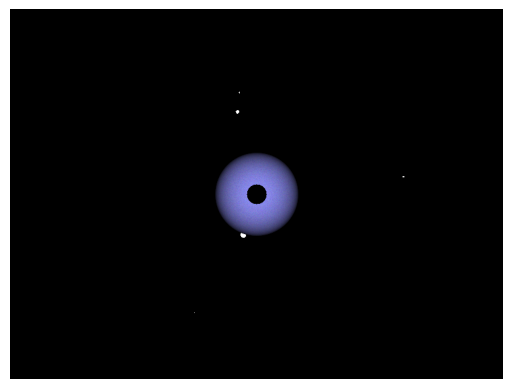

In [ ]:
# Display the image
import matplotlib.pyplot as plt
plt.imshow(np.clip(image, 0, 1))
plt.axis('off')
plt.show()

In [ ]:
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def jacobian_cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    
    dr_dx = x / r
    dr_dy = y / r
    dr_dz = z / r
    
    dtheta_dx = -x * z / (r**2 * np.sqrt(x**2 + y**2))
    dtheta_dy = -y * z / (r**2 * np.sqrt(x**2 + y**2))
    dtheta_dz = np.sqrt(x**2 + y**2) / (r**2)
    
    dphi_dx = -y / (x**2 + y**2)
    dphi_dy = x / (x**2 + y**2)
    dphi_dz = 0
    
    jacobian = np.array([
        [dr_dx, dr_dy, dr_dz],
        [dtheta_dx, dtheta_dy, dtheta_dz],
        [dphi_dx, dphi_dy, dphi_dz]
    ])
    
    return jacobian

# Example usage
x, y, z = 1, 1, 1
r, theta, phi = cartesian_to_spherical(x, y, z)
jacobian = jacobian_cartesian_to_spherical(x, y, z)

print("Spherical coordinates (r, theta, phi):", r, theta, phi)
print("Jacobian matrix:\n", jacobian)

Spherical coordinates (r, theta, phi): 1.7320508075688772 0.9553166181245092 0.7853981633974483
Jacobian matrix:
 [[ 0.57735027  0.57735027  0.57735027]
 [-0.23570226 -0.23570226  0.47140452]
 [-0.5         0.5         0.        ]]


In [ ]:
for star, size in stars:
    print(star.x, star.y, star.z, size)

-0.24781436437096285 0.21985345485685448 0.9435319280230642 0.029411527662389185
0.9876600070412909 -0.10150976213047579 -0.11926222655732865 0.011884159924846422
0.24007774951554878 0.12354488997020985 -0.9628599765021901 0.02298973961567901
-0.13904143876598946 0.7963378689617204 0.5886539533235035 0.024503030189723815
-0.43879735971358275 0.8213449318826022 -0.3644850888296424 0.014355664089195606
-0.5870129201926297 0.15846820665930003 0.7939166574679655 0.012247890765828221
-0.1834931231967239 -0.37238609439941406 0.9097575888320265 0.024079890202627557
0.40137895906281434 0.03503602576263374 0.9152417211427873 0.02876196326547352
0.00014423258560098475 -0.26967618370528057 0.9629510554224016 0.0208596516015601
-0.15125397557685988 -0.3893190617487414 -0.9085994183529253 0.024642465060652825
0.1542239407536061 0.8296867939908168 0.5365023764865056 0.025186429462854633
-0.055830351537456774 0.018063113191949504 -0.9982768632944564 0.019717877452089427
-0.5641409578009663 0.74390168

In [ ]:
# test background stars

# Generate random stars on the background shell
def generate_stars(num_stars):
    stars = []
    for _ in range(num_stars):
        theta = random.uniform(0, 2 * np.pi)
        phi = random.uniform(0, np.pi)
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        size = 10**random.uniform(-10, -4)  # Random size for the star
        stars.append((Vec3(x,y,z), size))
    return stars

# Example usage
num_stars = 100
stars = generate_stars(num_stars)

# Parameters
image_width = 800
image_height = 600

# Main function to render the scene
image = np.zeros((image_height, image_width, 3))
for y in range(image_height):
    for x in range(image_width):
        ray_direction = Vec3(x - image_width / 2, y - image_height / 2, -image_width / (2 * np.tan(np.pi / 4))).normalize()
        for star, size in stars:
            if(ray_direction.dot(star) > (1-size)):
                image[y, x] = [1, 1, 1]
            else:
                image[y, x] = [0, 0, 0]



# Render the scene
image = render_scene(image_width, image_height, None)

# Save or display the image using your preferred method

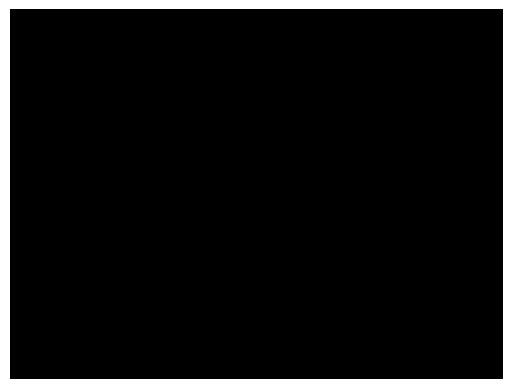

In [ ]:
# Display the image
import matplotlib.pyplot as plt
plt.imshow(np.clip(image, 0, 1))
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import random

# Generate random stars on the background shell
def generate_stars(num_stars):
    stars = []
    for _ in range(num_stars):
        theta = random.uniform(0, 2 * np.pi)
        phi = random.uniform(0, np.pi)
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        size = random.uniform(0.5, 2.0)  # Random size for the star
        stars.append((Vec3(x,y,z), size))
    return stars

# Function to normalize a vector
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

# Function to determine the color based on the night sky distribution
def night_sky_color(direction, stars):
    direction = normalize(direction)
    for star, size in stars:
        if np.linalg.norm(direction - normalize(star)) < size / 100.0:
            return Vec3(1,1,1)  # White color for stars
    return Vec3(0,0,0)  # Black color for the rest of the sky

# Example usage
num_stars = 1000
stars = generate_stars(num_stars)

# Test the function with a direction vector
direction = np.array([1, 1, 1])
color = night_sky_color(direction, stars)
print("Color:", color.x, color.y, color.z)

TypeError: unsupported operand type(s) for *: 'float' and 'Vec3'

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


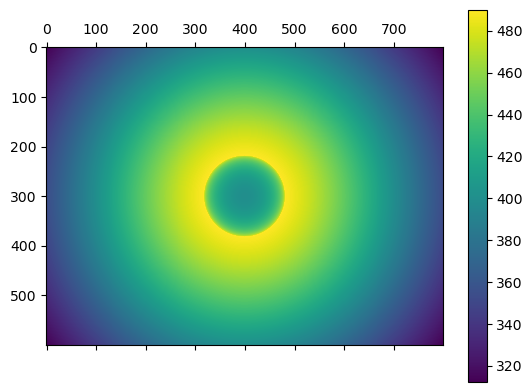

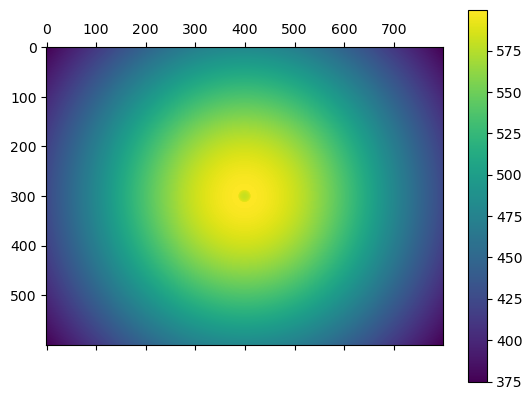

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to normalize a vector
def normalize(v):
    norm = np.linalg.norm(v, axis=-1, keepdims=True)
    return np.where(norm == 0, v, v / norm)

# Generate a bright blue color with slight variations
def bright_blue_color():
    red = random.uniform(0, 0.1)
    green = random.uniform(0, 0.1)
    blue = random.uniform(0.9, 1.0)
    return np.array([red, green, blue])

# Ray tracing function
def trace_ray(ray_origins, ray_directions, centers, radii, colors, is_light, background_color):
    image_height, image_width, _ = ray_directions.shape
    colors_output = np.tile(background_color, (image_height, image_width, 1))

    hit_t = np.inf * np.ones((image_height, image_width))
    
    for center, radius, color, light in zip(centers, radii, colors, is_light):
        oc = ray_origins - center
        a = np.sum(ray_directions * ray_directions, axis=-1)
        b = 2.0 * np.sum(oc * ray_directions, axis=-1)
        c = np.sum(oc * oc, axis=-1) - radius**2
        discriminant = b * b - 4 * a * c
        hit_mask = discriminant >= 0
        sqrt_discriminant = np.sqrt(discriminant * hit_mask)
        t1 = (-b - sqrt_discriminant) / (2.0 * a)
        t2 = (-b + sqrt_discriminant) / (2.0 * a)
        t = np.minimum(t1, t2)
        plt.matshow(t)
        plt.colorbar()
        
        hit_points = ray_origins + ray_directions * t[..., np.newaxis] * hit_mask[..., np.newaxis]
        normals = normalize(hit_points - center)
        
        if light:
            colors_output = bright_blue_color() * hit_mask[..., np.newaxis]
            print(hit_mask)
        else:
            ns_center = centers[is_light][0]
            light_dir = normalize(ns_center - hit_points)
            light_intensity = np.maximum(0, np.sum(light_dir * normals, axis=-1))
            distance = np.linalg.norm(ns_center - hit_points, axis=-1)
            attenuation = 1 / (distance * distance)
            glow_intensity = light_intensity * attenuation
            colors_output = color * glow_intensity[..., np.newaxis] * hit_mask[..., np.newaxis]
    
    return colors_output

# Main function to render the scene
def render_scene(image_width, image_height, centers, radii, colors, is_light, background_color):
    x = np.linspace(-image_width / 2, image_width / 2, image_width)
    y = np.linspace(-image_height / 2, image_height / 2, image_height)
    xv, yv = np.meshgrid(x, y)
    zv = -image_width / (2 * np.tan(np.pi / 4)) * np.ones_like(xv)
    ray_directions = np.stack((xv, yv, zv), axis=-1)
    ray_directions = normalize(ray_directions)
    ray_origins = np.zeros_like(ray_directions)
    colors_output = trace_ray(ray_origins, ray_directions, centers, radii, colors, is_light, background_color)
    return colors_output

# Parameters
image_width = 800
image_height = 600

# Define spheres
centers = np.array([
    [0, 0, -500],  # Black hole
    [0, 0, -600]  # Neutron star
])
radii = np.array([100, 20])
colors = np.array([
    [0, 0, 0],  # Black hole color
    [1, 1, 1]  # Neutron star color
])
is_light = np.array([False, True])

# Background color (black)
background_color = np.array([0, 0, 0])

# Render the scene
image = render_scene(image_width, image_height, centers, radii, colors, is_light, background_color)
print(image)
# # Display the image
# plt.imshow(np.clip(image, 0, 1))
# plt.axis('off')
# plt.show()

In [149]:
# solve geodesics for photons in Schwarzschild metric
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Constants
# G = 6.67430e-11  # Gravitational constant
# c = 3.0e8        # Speed of light
# M = 1.0e30       # Mass of the black hole (in kg)
c, G = 1, 1
M = 1
rs = 2 * G * M / c**2  # Schwarzschild radius

def normalize(v):
    norm = np.linalg.norm(v, axis=-1, keepdims=True)
    return np.where(norm == 0, v, v / norm)

def cartesian_to_spherical(x3U_cart, u3U_cart):
    # Extract Cartesian position and velocity components
    x, y, z = x3U_cart[0], x3U_cart[1], x3U_cart[2]
    vx, vy, vz = u3U_cart[0], u3U_cart[1], u3U_cart[2]

    # Compute the radial distance r
    r = np.sqrt(x**2 + y**2 + z**2)

    # Compute the polar angle theta (colatitude)
    theta = np.arccos(z / r)

    # Compute the azimuthal angle phi (longitude)
    phi = np.arctan2(y, x)  # Handles quadrant correctly

    # Spherical position vector [r, theta, phi]
    x3U_sphe = [r, theta, phi]

    # Compute the radial velocity component (v_r)
    v_r = (x / r) * vx + (y / r) * vy + (z / r) * vz

    # Compute the polar velocity component (v_theta)
    v_theta = (x * z / (r**2 * np.sqrt(x**2 + y**2))) * vx \
            + (y * z / (r**2 * np.sqrt(x**2 + y**2))) * vy \
            - (np.sqrt(x**2 + y**2) / r**2) * vz

    # Compute the azimuthal velocity component (v_phi)
    v_phi = (-y / (x**2 + y**2)) * vx \
          + (x / (x**2 + y**2)) * vy

    # Spherical velocity vector [v_r, v_theta, v_phi]
    u3U_sphe = [v_r, v_theta, v_phi]

    return x3U_sphe, u3U_sphe



def g4DD_diag(x4U):
    t, rad, the, phi = x4U
    gDD00, gDD11, gDD22, gDD33 = -(1-rs/rad), 1/(1-rs/rad), rad**2, (rad**2 * np.sin(the)**2)
    return np.array([gDD00, gDD11, gDD22, gDD33])

def g4UU_diag(x4U):
    t, rad, the, phi = x4U
    gUU00, gUU11, gUU22, gUU33 = -1/(1-rs/rad), (1-rs/rad), 1/rad**2, 1/(rad**2 * np.sin(the)**2)
    return np.array([gUU00, gUU11, gUU22, gUU33])

# Geodesic equations for Schwarzschild metric
def geodesics(t, var):
    #conserved quantities
    #pt=-E, pphi=L
    # rad, the, phi, prad, pthe, pphi = y
    t, rad, the, phi, pt, prad, pthe, pphi = var
    gUU00, gUU11, gUU22, gUU33 = -1/(1-rs/rad), (1-rs/rad), 1/rad**2, 1/(rad**2 * np.sin(the)**2)
    # gDD00, gDD11, gDD22, gDD33 = -(1-rs/rad), 1/(1-rs/rad), rad**2, rad**2 * np.sin(the)**2
    d0gUU00, d0gUU11, d0gUU22, d0gUU33 = 0, 0, 0, 0
    d1gUU00, d1gUU11, d1gUU22, d1gUU33 = rs/rad**2 / (1-rs/rad)**2, rs/rad**2, -2/rad**3, -2/(rad**3 * np.sin(the)**2)
    d2gUU00, d2gUU11, d2gUU22, d2gUU33 = 0, 0, 0, -2*np.cos(the)/(rad**2*np.sin(the)**3)
    d3gUU00, d3gUU11, d3gUU22, d3gUU33 = 0, 0, 0, 0
    # pt = -np.sqrt(-(prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33) / gUU00)
    # m2 = pt**2 * gUU00 + prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33
    # print(m2)
    dtdt    = pt   * gUU00
    draddt  = prad * gUU11
    dthedt  = pthe * gUU22
    dphidt  = pphi * gUU33 
    dptdt   = -1/2 * (d0gUU00 * pt**2 + d0gUU11 * prad**2 + d0gUU22 * pthe**2 + d0gUU33 * pphi**2) # 0
    dpraddt = -1/2 * (d1gUU00 * pt**2 + d1gUU11 * prad**2 + d1gUU22 * pthe**2 + d1gUU33 * pphi**2)
    dpthedt = -1/2 * (d2gUU00 * pt**2 + d2gUU11 * prad**2 + d2gUU22 * pthe**2 + d2gUU33 * pphi**2)
    dpphidt = -1/2 * (d3gUU00 * pt**2 + d3gUU11 * prad**2 + d3gUU22 * pthe**2 + d3gUU33 * pphi**2) # 0
    # print([dtdt, draddt, dthedt, dphidt, dptdt, dpraddt, dpthedt, dpphidt])
    return [dtdt, draddt, dthedt, dphidt, dptdt, dpraddt, dpthedt, dpphidt]
    # return [draddt, dthedt, dphidt, dpraddt, dpthedt, dpphidt]

def interpolate_array(array, new_size):
    """
    Interpolates a 1D NumPy array to a new size.

    Parameters:
    array (np.ndarray): 1D NumPy array to be interpolated.
    new_size (int): The size of the output array.

    Returns:
    np.ndarray: Interpolated array of the new size.
    """
    # Create an interpolation function
    x = np.linspace(0, 1, len(array))
    f = interp1d(x, array, kind='linear')

    # Interpolate to the new size
    x_new = np.linspace(0, 1, new_size)
    interpolated_array = f(x_new)
    return interpolated_array

# Initial conditions
box_size = 20*rs
image_width, image_height = 20,15

pixel_to_unit = 0.01 / image_width
pixely_arr = np.linspace(-image_width / 2, image_width / 2, image_width)
pixelz_arr = np.linspace(-image_height / 2, image_height / 2, image_height)

traj_N = 1000

traj_x = np.zeros((image_width, image_height,traj_N))
traj_y = np.zeros((image_width, image_height,traj_N))
traj_z = np.zeros((image_width, image_height,traj_N))


for w,pixely in enumerate(pixely_arr):
    for h,pixelz in enumerate(pixelz_arr):
        # pixelx = image_width/2
        # pixely = image_height/2
        pixelx = -image_width /2
        ray_directions = np.array([pixelx, pixely, pixelz])
        
        coord_t0 = 0
        coord_x0 = 20*rs
        coord_y0 = 0*rs + pixely * pixel_to_unit
        coord_z0 = 0*rs + pixelz * pixel_to_unit
        x4U_cart = np.array([coord_t0, coord_x0, coord_y0, coord_z0])

        u3U_cart = normalize(ray_directions)
        x3U_sphe, u3U_sphe  = cartesian_to_spherical(x4U_cart[1:], u3U_cart)
        
        coord_rad0, coord_the0, coord_phi0    = x3U_sphe
        
        urad0, uthe0, uphi0                   = u3U_sphe

        x4U = np.array([coord_t0, coord_rad0, coord_the0, coord_phi0])
        u4U = np.array([0, urad0, uthe0, uphi0])
        ut0 = np.sqrt(-np.sum(u4U**2 * g4DD_diag(x4U))/g4DD_diag(x4U)[0])
        
        u4U = np.array([ut0, urad0, uthe0, uphi0])
        
        p4D = g4DD_diag(x4U) * u4U

        pt0, prad0, pthe0, pphi0 = p4D

        # Time span for the integration
        t_span = (0, 1000)
        # var0 = [rad0, the0, phi0, prad0, ptshe0, pphi0]
        # var0 = [t0, rad0, the0, phi0, pt0, prad0, pthe0, pphi0]
        var0 = np.hstack([x4U, p4D])

        # Solve the geodesic equations
        sol = solve_ivp(geodesics, t_span, var0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 10000))

        # Extract the solution
        # rad = sol.y[0]
        # the = sol.y[1]
        # phi = sol.y[2]

        
        t, rad, the, phi, pt, prad, pthe, pphi = sol.y
        # Convert to Cartesian coordinates for plotting
        x = rad * np.sin(the) * np.cos(phi)
        y = rad * np.sin(the) * np.sin(phi)
        z = rad * np.cos(the)
        traj_x[w,h] = interpolate_array(x, traj_N)
        traj_y[w,h] = interpolate_array(y, traj_N)
        traj_z[w,h] = interpolate_array(z, traj_N)
        
    
# ax.plot(y[:1000],x[:1000],'.',color = "blue", alpha=0.2)


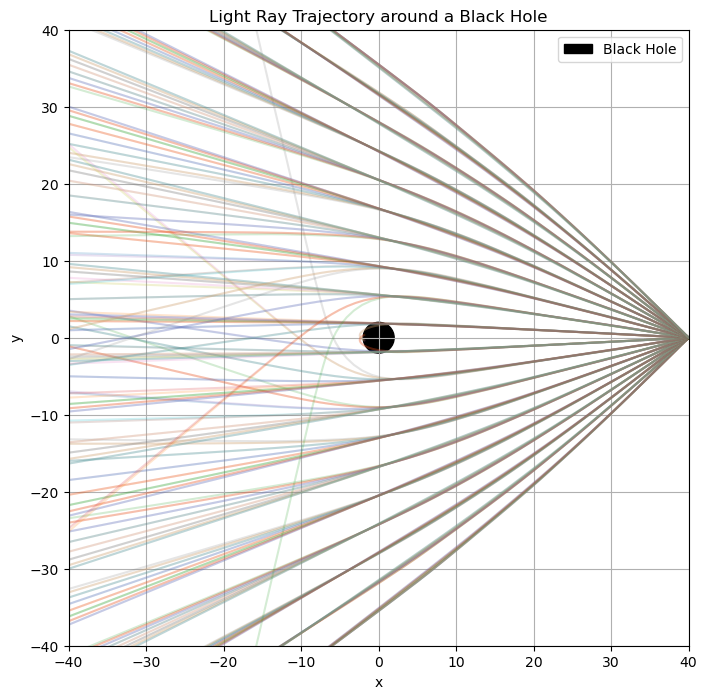

In [150]:
import matplotlib.patches as patches
# Plot the trajectory of the light ray
fig, ax = plt.subplots(figsize=(8, 8))
# Define a colormap
cmap = plt.get_cmap('viridis')
for w,pixely in enumerate(pixely_arr):
    for h,pixelz in enumerate(pixelz_arr): 
        ax.plot(traj_x[w,h],traj_y[w,h], alpha=0.2)
# Add a circle with radius 2 at the origin to represent the black hole
circle = patches.Circle((0, 0), 2, color='black', label='Black Hole')
ax.add_patch(circle)


ax.set_xlim(-box_size, box_size)
ax.set_ylim(-box_size, box_size)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Light Ray Trajectory around a Black Hole')
ax.legend()
ax.grid(True)
plt.show()

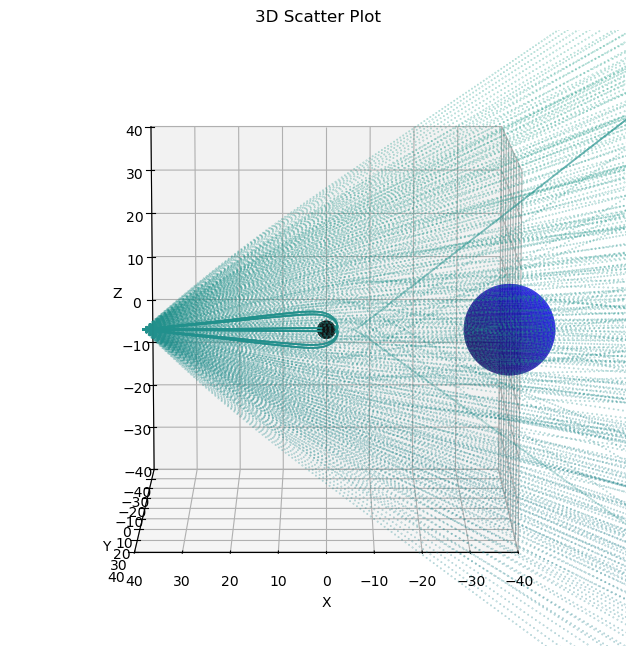

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the sphere
def create_sphere(radius, num_points):
    phi = np.linspace(0, np.pi, num_points)
    theta = np.linspace(0, 2 * np.pi, num_points)
    phi, theta = np.meshgrid(phi, theta)
    
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    
    return x, y, z






# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(traj_x, traj_y, traj_z, c=traj_z,s=0.1,alpha=0.5, cmap='viridis')
# sc = ax.plot(traj_x, traj_y, traj_z,".",alpha=0.5)

# Create the sphere
sphere_points = 50
BH_x, BH_y, BH_z = create_sphere(rs, sphere_points)
ax.plot_surface(BH_x, BH_y, BH_z, color='black')
NS_x, NS_y, NS_z = create_sphere(5*rs, sphere_points)
ax.plot_surface(NS_x-20*rs, NS_y, NS_z,color='blue', alpha=0.6)

# Add color bar which maps values to colors
# plt.colorbar(sc)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-box_size, box_size)
ax.set_ylim(-box_size, box_size)
ax.set_zlim(-box_size, box_size)
# Change the viewing angle
ax.view_init(elev=10, azim=90)  # Different elevation and azimuthal angles

plt.title('3D Scatter Plot')
# Set an equal aspect ratio
ax.set_aspect('equal')

# Show the plot
plt.show()


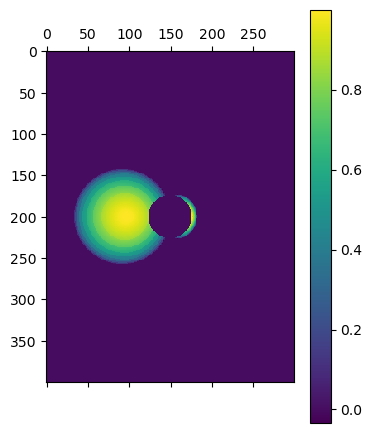

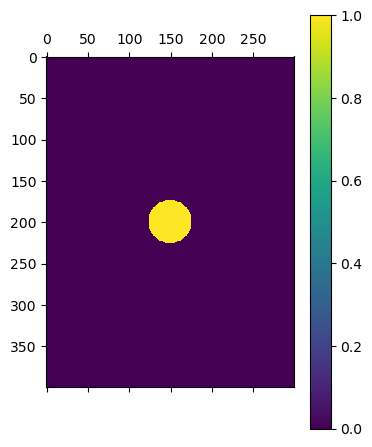

In [135]:

def hit_ns(traj_x, traj_y, traj_z, ns_pos, ns_rad):
    # Calculate the distance from each point to the neutron star position
    distances = np.sqrt((traj_x - ns_pos[0])**2 + (traj_y - ns_pos[1])**2 + (traj_z - ns_pos[2])**2)
    
    # Determine if the distance is smaller than the neutron star radius
    hits = distances < ns_rad
    
    return hits

def hit_sky(traj_x, traj_y, traj_z, sky_pos, sky_rad):
    # Calculate the distance from each point to the neutron star position
    distances = np.sqrt((traj_x - sky_pos[0])**2 + (traj_y - sky_pos[1])**2 + (traj_z - sky_pos[2])**2)
    
    # Determine if the distance is smaller than the neutron star radius
    hits = distances > sky_rad
    return hits


sky_rad = 70*rs
NS_rad = 5*rs
BH_vis_rad = 1.1*rs

NS_pos = np.array([0,0,-5*rs])

hits_bh = hit_ns(traj_x, traj_y, traj_z, np.array([0,0,0]), BH_vis_rad)
hits_ns = hit_ns(traj_x, traj_y, traj_z, NS_pos, NS_rad)
hits_sky = hit_sky(traj_x, traj_y, traj_z, np.array([0,0,0]), sky_rad)

BH_mask  = np.any(hits_bh, axis=-1)
NS_mask  = np.any(hits_ns, axis=-1) * (1-BH_mask)
sky_mask = np.any(hits_sky, axis=-1) * (1-BH_mask) * (1-NS_mask)
NS_first_hit  = np.argmax(hits_ns , axis=-1)
sky_first_hit = np.argmax(hits_sky, axis=-1)

NS_hit_x = traj_x[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit]
NS_hit_y = traj_y[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit]
NS_hit_z = traj_z[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit]

sky_hit_x = traj_x[np.arange(image_width)[:, None],np.arange(image_height),sky_first_hit]
sky_hit_y = traj_y[np.arange(image_width)[:, None],np.arange(image_height),sky_first_hit]
sky_hit_z = traj_z[np.arange(image_width)[:, None],np.arange(image_height),sky_first_hit]

NS_hit_vx = NS_hit_x - traj_x[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit-1]
NS_hit_vy = NS_hit_y - traj_y[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit-1]
NS_hit_vz = NS_hit_z - traj_z[np.arange(image_width)[:, None],np.arange(image_height),NS_first_hit-1]

NS_hit_nx = NS_hit_x - NS_pos[0]
NS_hit_ny = NS_hit_y - NS_pos[1]
NS_hit_nz = NS_hit_z - NS_pos[2]

NS_intensity = - (NS_hit_vx * NS_hit_nx + NS_hit_vy * NS_hit_ny + NS_hit_vz * NS_hit_nz)\
        /(np.sqrt(NS_hit_vx**2 + NS_hit_vy**2 + NS_hit_vz**2)+1e-15)\
        /(np.sqrt(NS_hit_nx**2 + NS_hit_ny**2 + NS_hit_nz**2+1e-15))

plt.matshow(NS_intensity*NS_mask)
plt.colorbar()

plt.matshow(BH_mask)
plt.colorbar()

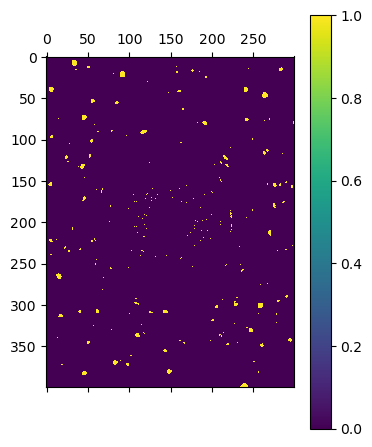

In [136]:
import random
# Generate random stars on the background shell
def generate_stars(num_stars, sky_rad):
    star_pos = np.zeros((num_stars,3))
    star_size = np.zeros(num_stars)
    for i in range(num_stars):
        theta = random.uniform(0, 2 * np.pi)
        phi = random.uniform(0, np.pi)
        x = sky_rad*np.sin(phi) * np.cos(theta)
        y = sky_rad*np.sin(phi) * np.sin(theta)
        z = sky_rad*np.cos(phi)
        star_size[i] = 10**random.uniform(-10, -4)  # Random size for the star
        # star_size[i] = 10**random.uniform(-6, -4)  # Random size for the star
        star_pos[i]  = np.array([x,y,z])
    return star_pos, star_size

num_stars = 5000
star_pos, star_size = generate_stars(num_stars,sky_rad)
sky_hit_pos = np.stack((sky_hit_x,sky_hit_y,sky_hit_z),axis=-1)
hit_star_all = np.zeros((image_width,image_height,num_stars))
for i in range(num_stars):
    cos_angle = np.dot(sky_hit_pos,star_pos[i,:]) / (sky_rad*np.sqrt(np.sum(sky_hit_pos**2,axis=-1)))
    hit_star_all[:,:,i] = cos_angle > (1-star_size[i])

star_mask = np.any(hit_star_all,axis=-1)
plt.matshow(star_mask)
plt.colorbar()

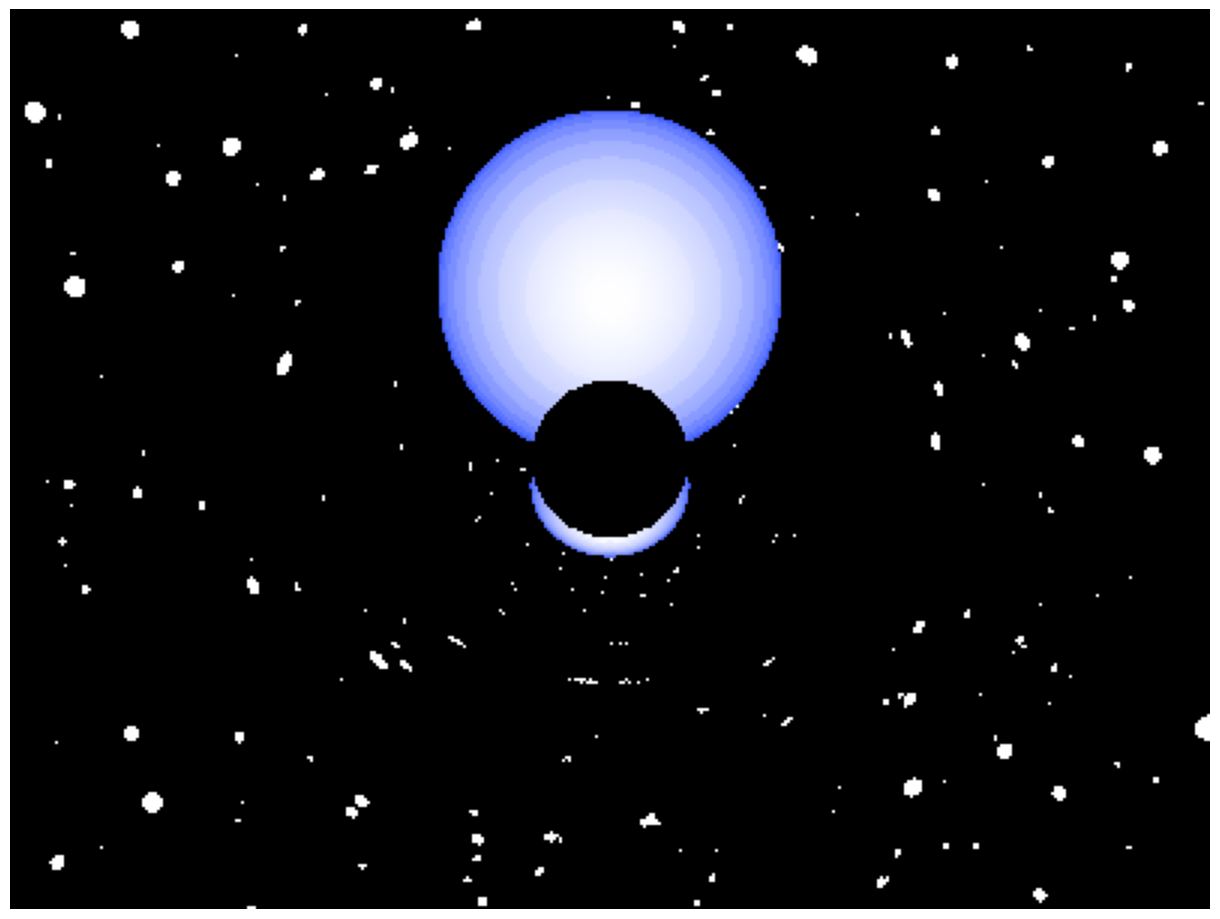

In [146]:
fig = plt.figure(figsize=(14.5,9))
ax = fig.gca()

final_color = np.zeros((image_width,image_height,3))
NS_color_dark     = np.array([60, 90, 255])/255
NS_color_bright   = np.array([255, 255, 255])/255
BH_color   = np.array([0,0,0])
star_color = np.array([1,1,1])
final_color = NS_color_bright * NS_intensity[...,None] * NS_mask[...,None] \
            + NS_color_dark * NS_mask[...,None] * (1-NS_intensity[...,None]) \
            + BH_color * BH_mask[...,None] \
            + star_color * star_mask[...,None] * sky_mask[...,None] 

image = np.transpose(final_color, (1, 0, 2))
ax.imshow(np.clip(image, 0, 1))
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
import os
fig.savefig(os.getcwd()+"/bh3d_local.png",bbox_inches='tight',pad_inches=0)